In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv(
    "data/walmart_stock.csv", 
    parse_dates=["Date"],
    index_col="Date"
)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [4]:
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


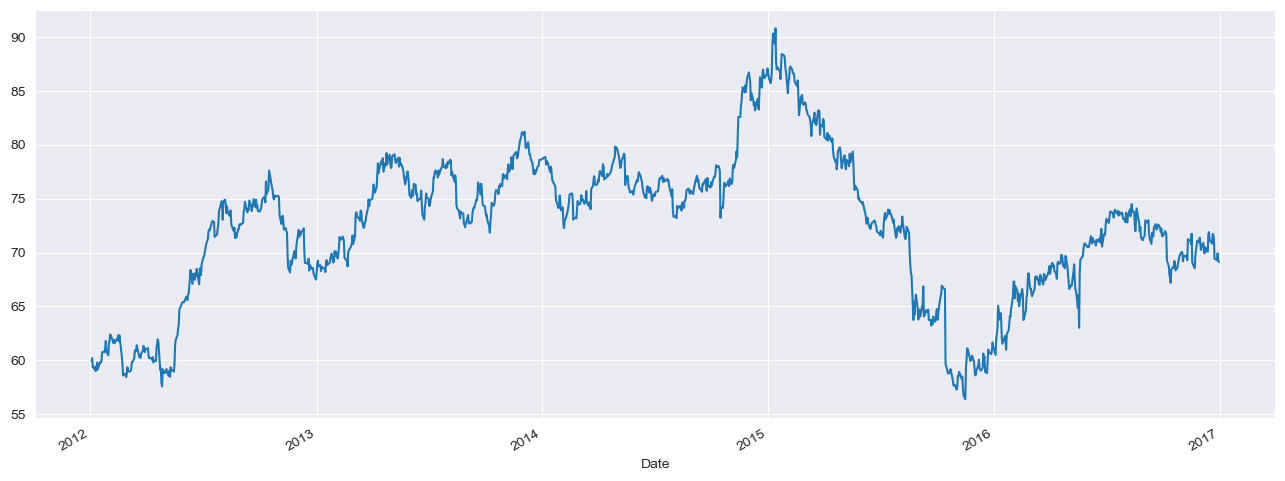

In [6]:
data.Open.plot(figsize=(16, 6));

In [8]:
data.rolling(window=7).mean().head(8)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567


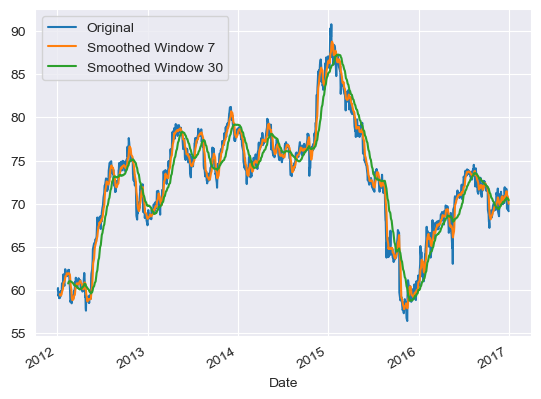

In [15]:
data.Open.plot(label="Original")
data.Open.rolling(window=7).mean().plot(label="Smoothed Window 7")
data.Open.rolling(window=30).mean().plot(label="Smoothed Window 30")
plt.legend();

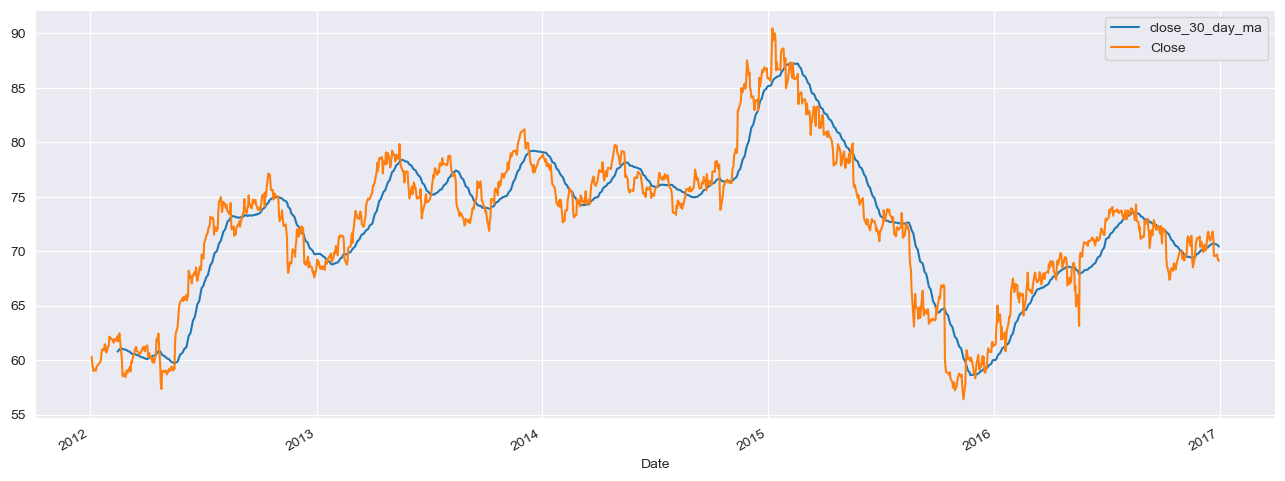

In [17]:
data["close_30_day_ma"] = data.Close.rolling(window=30).mean()
data[["close_30_day_ma", "Close"]].plot(figsize=(16, 6));

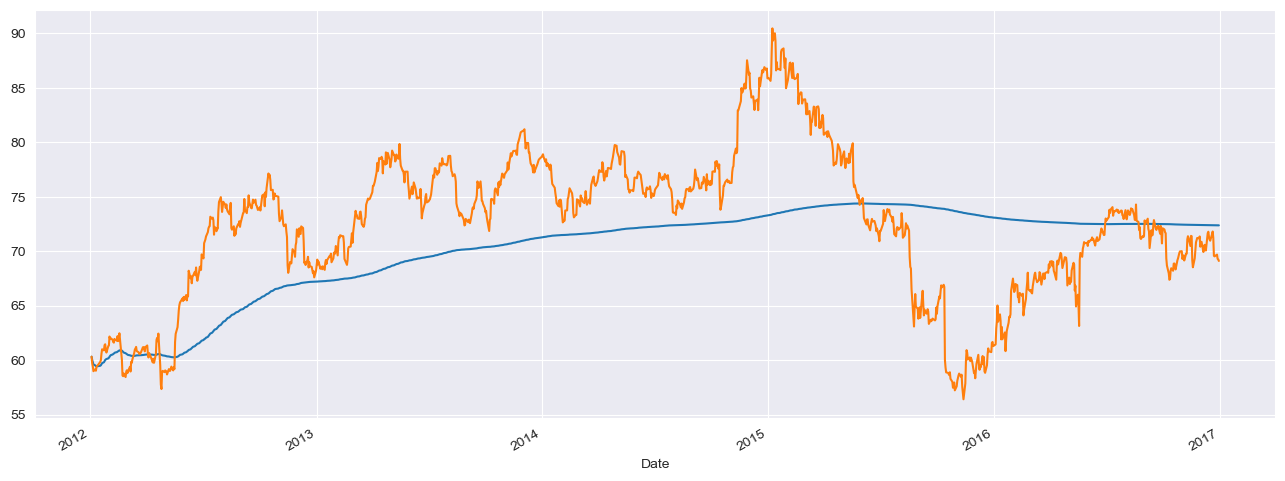

In [19]:
data.Close.expanding(min_periods=1).mean().plot(figsize=(16, 6))
data.Close.plot();

<Axes: xlabel='Date'>

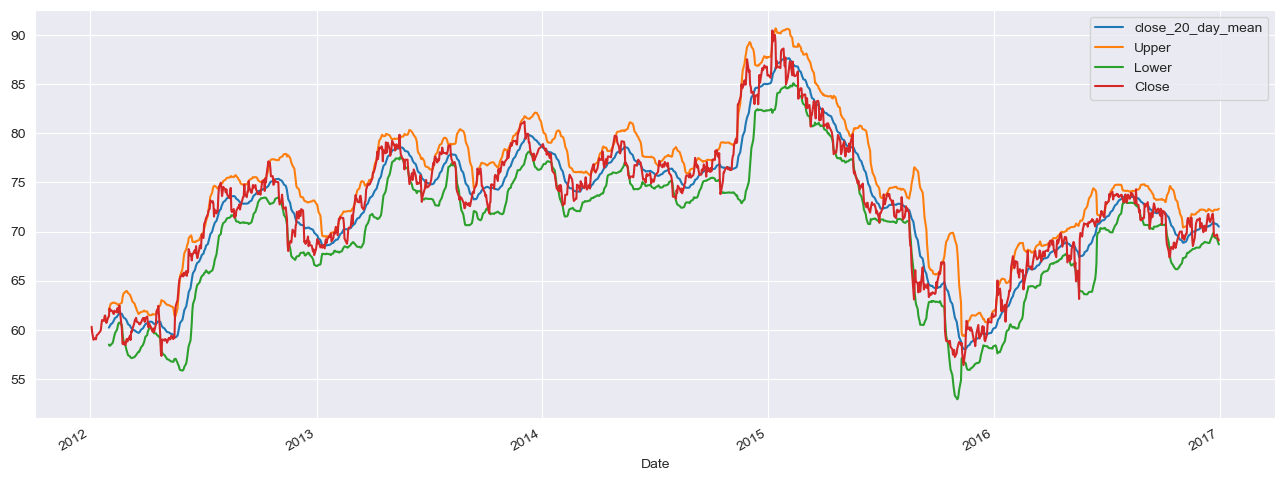

In [23]:
# Close 20 Ma
data["close_20_day_mean"]= data.Close.rolling(window=20).mean()
# Upper = 20MA + 2 * std(20)
data["Upper"] = data["close_20_day_mean"] + (2 * (data.Close.rolling(window=20).std())) 
# Lower = 20MA - 2 * std(20)
data["Lower"] = data["close_20_day_mean"] - (2 * (data.Close.rolling(window=20).std())) 

# Close
data[["close_20_day_mean", "Upper", "Lower", "Close"]].plot(
    figsize=(16, 6)
)

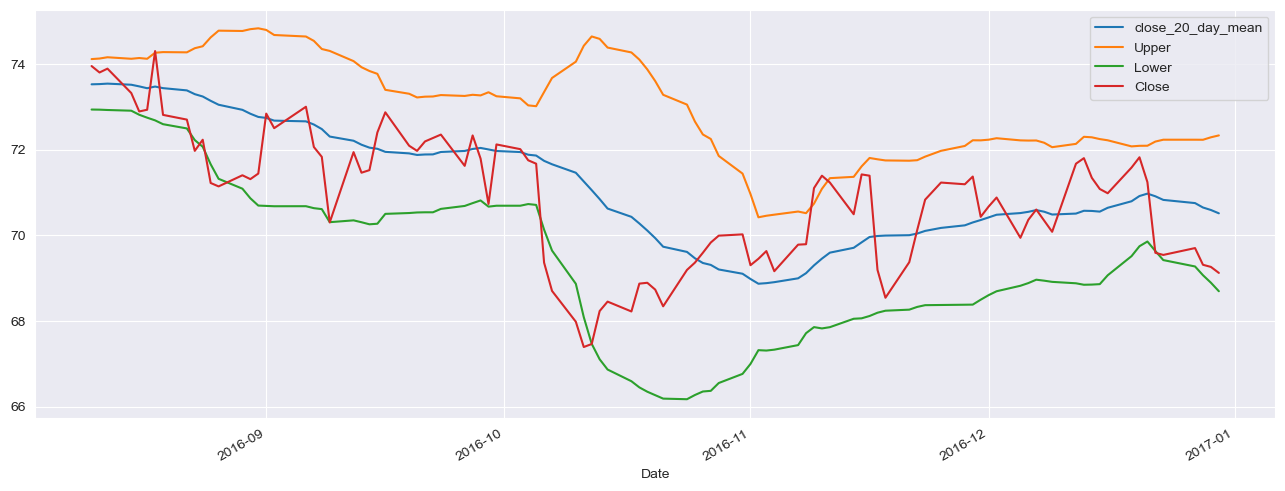

In [25]:
data[["close_20_day_mean", "Upper", "Lower", "Close"]].tail(100).plot(
    figsize=(16, 6)
);